## Final Project Submission

Please fill out: 
* Student name:  Mwangi Wambugu   
* Student pace: full time
* Scheduled project review date/time: 15/09/2023 12:00pm
* Instructor name: Nikita Ngoroge
* Blog post URL:


## Microsoft Entry into the Movie Space.



Importing Libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# The relevant imported files are here.

# sqlite3
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Connect to the sql 
conn = sqlite3.connect("zippedData/im.db")

# This SQL queries an sql file and returns a pandas data frame
def sqldata(query):
    return pd.read_sql(query, conn)

## Loading Data as a Data Frame

In [2]:
# This query opens the master
sqldata("SELECT * FROM sqlite_master;") 


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [3]:
# This query opens the table under the master and assign it a variable
basics = sqldata("SELECT* FROM movie_basics")  
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
# This query opens the table under the master and assign it a variable.
ratings = sqldata("SELECT* FROM movie_ratings")
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [5]:
# This query opens a dataframe and assign it a variable.
budget = pd.read_csv("zippedData/bom.movie_gross.csv")
budget.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
# This query opens a dataframe and assign it a variable.
movie_info = pd.read_csv("zippedData/tmdb.movies.csv", index_col= 0)
movie_info.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Cleaning
The data cleaning process cleans the data into useable data so as to bring about the desired outcome.

### Cleaning movie_basics

In [7]:
# This arranges the dataframe in a summary
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# The summary statistics in the data frame
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [9]:
# checks through the dataframe for null values and checks to see if their are true statemets in the dataframe
basics.isnull().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [10]:
# The sum() method will give the total number of missing values in each column within the data frame 
basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

At this point it was prudent to find the percentages of the null values.

In [11]:
# A variable is assigned to represent the null values within the data frame
null_count= basics.isnull().sum()
null_count

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
# Checking for the shape of the data
total_count = basics.shape[0]
total_count

146144

In [13]:
# Checking for the percentage of null values
percentage = (null_count/total_count)*100
percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [14]:
#Dropping the null values
basics.dropna(subset=['original_title'], inplace = True)

In [15]:
#Dropping the null values
basics.dropna(subset=['genres'], inplace = True)

In [16]:
# Replacing the null values with the mean
basics['runtime_minutes'].fillna(basics['runtime_minutes'].mean(), inplace=True)

In [17]:
#Checking the overall structure for any ull values
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [18]:
#Checking for duplicate values in the data frame
basics.duplicated().sum()

0

### Cleaning for movie_ratings

In [19]:
#Checking the overall structure of the Data frame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
#summary f statistics in the data frame
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [21]:
# checks through the dataframe for null values and checks to see if their are true statemets in the dataframe
ratings.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [22]:
#Checks for duplicates
ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

In [23]:
#Check for unique values
ratings.value_counts()

movie_id   averagerating  numvotes
tt0063540  7.0            77          1
tt4875844  7.3            758         1
tt4862468  3.6            323         1
tt4862190  8.2            117         1
tt4862056  8.3            14          1
                                     ..
tt2418510  6.3            310         1
tt2418480  8.3            55          1
tt2418440  6.3            4551        1
tt2418384  7.0            13          1
tt9916160  6.5            11          1
Length: 73856, dtype: int64

### Cleaning bom.movie_gross.csv


In [24]:
#Check structure the dataframe
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
# checks summary statisics of the data frame
budget.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [26]:
#Checks through null values that return a value of True
budget.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [27]:
#Checks total null values
null_count1 = budget.isnull().sum()
null_count1

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
#Checks total number of rows
total_count1 = budget.shape[0]
total_count1

3387

In [29]:
#Checkd percentage of nul values missing
percentage1 =(null_count1/total_count1)*100
percentage1

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [30]:
##Drops all null values
budget.dropna(subset=['studio'], inplace = True)

In [31]:
#Drops all null values
budget.dropna(subset=['domestic_gross'], inplace = True)

In [32]:
#Drops all null values
budget.dropna(subset=['foreign_gross'], inplace = True)

              

In [33]:
#Checks unique values in the data frame
budget.value_counts()

title                           studio    domestic_gross  foreign_gross  year
'71                             RAtt.     1300000.0       355000         2015    1
Solo: A Star Wars Story         BV        213800000.0     179200000      2018    1
Sparkle (2012)                  TriS      24400000.0      240000         2012    1
Space Dogs 3D                   EpicPics  14400.0         8300000        2012    1
Southside with You              RAtt.     6300000.0       208000         2016    1
                                                                                ..
Hubble 3D                       WB        52400000.0      21500000       2010    1
Howl                            Osci.     617000.0        566000         2010    1
How to be a Latin Lover         PNT       32100000.0      29700000       2017    1
How to Train Your Dragon 2      Fox       177000000.0     444500000      2014    1
xXx: The Return of Xander Cage  Par.      44900000.0      301200000      2017    1
Length: 2

### Cleaning Movie_info

In [34]:
#Checks structure or the data frame
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [35]:
#Checks summary statistics of dataframe
movie_info.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [36]:
#Checks through the first 5 rows
movie_info.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [37]:
#Checks for null values
movie_info.isnull().any()

genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

### Joining the movie_basics data frame with the movie_ratings data frame

We are able to sift through both data frame through a common column to have a bigge data frame so that we could figure out the relaton between each column.

In [38]:
basic_ratings = sqldata("""SELECT * FROM  movie_basics
                                LEFT JOIN  movie_ratings
                                USING (movie_id) """) 
basic_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [39]:
#Adding an extra column 
genres_list = sorted(set(
    genre.strip() for genres in basic_ratings["genres"] if genres is not None for genre in genres.split(",")
))
basic_ratings['all_genres'] = basic_ratings['genres'].apply(lambda x: [genre.strip() for genre in x.split(",")] if x else [])
basic_ratings


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,all_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,[Drama]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,[Comedy]
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN,[]


In [40]:
# Creates a ne list called genre_list
genre_list = []

#Iterates through the basic_ratings to find tthe run_time and genres
for index, row in basic_ratings.iterrows():
    runtime_minutes = row['runtime_minutes']
    genres = row['genres']
    
    # Check if 'genres' is None before iterating
    if genres is not None:
        for genre in genres.split(','):
            genre_list.append({'runtime_minutes': runtime_minutes, 'genres': genre.strip()})

#Creates new data frame from the genre list
run_genre = pd.DataFrame(genre_list)
run_genre


,runtime_minutes,genres
0,175.0,Action
1,175.0,Crime
2,175.0,Drama
3,114.0,Biography
4,114.0,Drama
...,...,...
229545,NaN,War
229546,123.0,Drama
229547,NaN,Documentary
229548,NaN,Comedy


In [41]:
#Counts occurence of unique values in genres
popular_genre = run_genre["genres"].value_counts()
popular_genre

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

In [42]:
selected_columns = ['all_genres', 'averagerating']

# Use DataFrame indexing to select the desired columns
result = basic_ratings[selected_columns]
result.dropna(inplace=True)
result

C:\Users\user\AppData\Local\Temp\ipykernel_8496\787116522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.dropna(inplace=True)


,all_genres,averagerating
0,"[Action, Crime, Drama]",7.0
1,"[Biography, Drama]",7.2
2,[Drama],6.9
3,"[Comedy, Drama]",6.1
4,"[Comedy, Drama, Fantasy]",6.5
...,...,...
146115,[Documentary],6.2
146122,"[Drama, Family]",8.7
146125,[Documentary],8.5
146129,[],6.6


In [43]:
#Creates new list
genre_data = []
#Iterates through results
for index,record in result.iterrows():
    genre_list = record["all_genres"]
#Iterates through to find the if the length of genre_list is greater than one
    if len(genre_list) >1:
        for individual in genre_list:
            genre_data.append({individual:result.at[index,"averagerating"]})
 #Iterates through to find the if the length of genre_list ==1           
    elif len(genre_list) ==1:
        genre_data.append({genre_list[0]:result.at[index,"averagerating"]})

genre_data 

# this section of cde assigns a rating to every iteration of the genre

[{'Action': 7.0},
 {'Crime': 7.0},
 {'Drama': 7.0},
 {'Biography': 7.2},
 {'Drama': 7.2},
 {'Drama': 6.9},
 {'Comedy': 6.1},
 {'Drama': 6.1},
 {'Comedy': 6.5},
 {'Drama': 6.5},
 {'Fantasy': 6.5},
 {'Horror': 4.1},
 {'Thriller': 4.1},
 {'Adventure': 8.1},
 {'Animation': 8.1},
 {'Comedy': 8.1},
 {'Drama': 6.8},
 {'History': 4.6},
 {'Documentary': 7.6},
 {'Drama': 6.9},
 {'Documentary': 7.5},
 {'Animation': 7.8},
 {'Drama': 7.8},
 {'History': 7.8},
 {'Drama': 4.0},
 {'Drama': 8.8},
 {'Drama': 4.0},
 {'Mystery': 4.0},
 {'Action': 1.9},
 {'Animation': 1.9},
 {'Comedy': 1.9},
 {'Crime': 6.7},
 {'Drama': 6.7},
 {'Biography': 5.9},
 {'Comedy': 5.9},
 {'Drama': 5.9},
 {'Documentary': 7.8},
 {'Drama': 7.1},
 {'Action': 7.4},
 {'Drama': 7.4},
 {'Documentary': 7.0},
 {'History': 7.0},
 {'Sci-Fi': 6.6},
 {'Comedy': 3.9},
 {'Documentary': 7.4},
 {'Thriller': 6.6},
 {'Crime': 6.7},
 {'Drama': 6.7},
 {'Adventure': 5.1},
 {'Animation': 5.1},
 {'Sci-Fi': 5.1},
 {'Action': 7.1},
 {'Crime': 7.1},
 {'Drama

In [44]:
# Returning the slip_genre into a dataframe
index_list = [key for data in genre_data for key in data.keys()]
values_list =[value for data in genre_data for value in data.values()]
genre_data_series = pd.Series(data = values_list, index = index_list)
genre_data_series

Action         7.0
Crime          7.0
Drama          7.0
Biography      7.2
Drama          7.2
              ... 
Documentary    6.2
Drama          8.7
Family         8.7
Documentary    8.5
Documentary    6.5
Length: 128490, dtype: float64

In [45]:
# it gives the mean values of every iteration of the genre
mean_values = genre_data_series.groupby(genre_data_series.index).mean()
mean_sorted = mean_values.sort_values(ascending=False)
mean_sorted


Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Music          7.091972
History        7.040956
Sport          6.961493
War            6.584291
Reality-TV     6.500000
Musical        6.498336
Drama          6.401559
Family         6.394725
Animation      6.248308
Adventure      6.196201
Romance        6.146608
Crime          6.115441
Comedy         6.002689
Mystery        5.920401
Fantasy        5.919473
Western        5.868214
Action         5.810361
Thriller       5.639114
Sci-Fi         5.489755
Horror         5.003440
Adult          3.766667
dtype: float64

### 

In [46]:
# converting the 'foreign_gross' column in the DataFrame to numeric values.
budget["foreign_gross"] = pd.to_numeric(budget["foreign_gross"], errors = "coerce")
#Replacing NaN values with 0
budget["foreign_gross"].replace(np.nan, 0, inplace=True)
#Calculates total_gross
budget["total_gross"]= budget["foreign_gross"] + budget["domestic_gross"]

budget


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


## Data Analysis ##

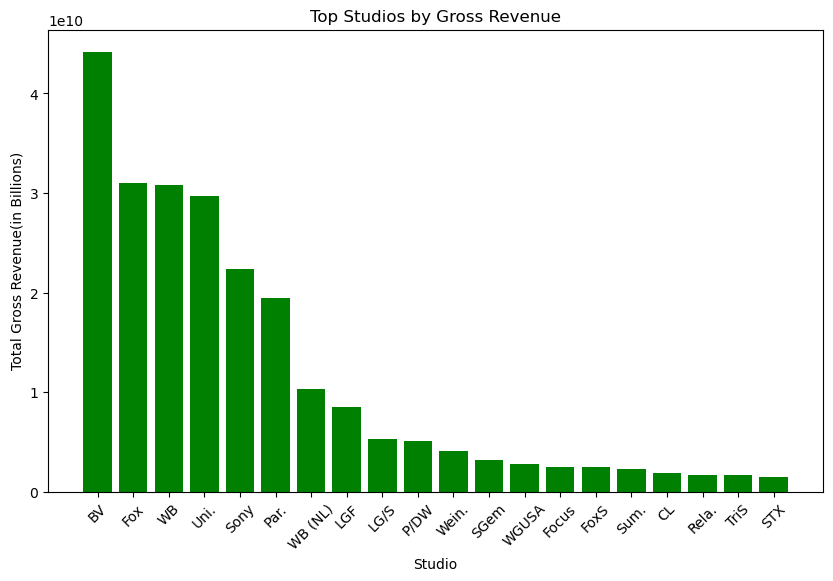

In [47]:
#Creatin a new data frame
budget_2= pd.DataFrame(budget)

#Group the data by 'studio' and sum the 'total_gross'
grouped = budget_2.groupby("studio")["total_gross"].sum().reset_index()

#Sort the grouped data in descending order by 'total_gross'
grouped_sorted = grouped.sort_values(by= "total_gross", ascending=False)

#Select the top N studios (e.g., top 5)
top_studios = grouped_sorted.head(20)

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_studios["studio"], top_studios["total_gross"], color="green")

#Set the titles and labels
plt.xlabel("Studio")
plt.ylabel("Total Gross Revenue(in Billions)")
plt.title("Top Studios by Gross Revenue")

#Show the plot
plt.xticks(rotation=45)
plt.show()

In [48]:
"""This analysis of the top studios by gross revenue offers valuable insights into the performance and competitiveness of studios in the entertainment industry. By identifying the leading studios in terms of earnings, stakeholders can make informed decisions regarding investments, partnerships, and market strategies.

For further analysis and decision-making, it is recommended to consider additional factors such as production costs, profitability, and market trends.
"""

'This analysis of the top studios by gross revenue offers valuable insights into the performance and competitiveness of studios in the entertainment industry. By identifying the leading studios in terms of earnings, stakeholders can make informed decisions regarding investments, partnerships, and market strategies.\n\nFor further analysis and decision-making, it is recommended to consider additional factors such as production costs, profitability, and market trends.\n'

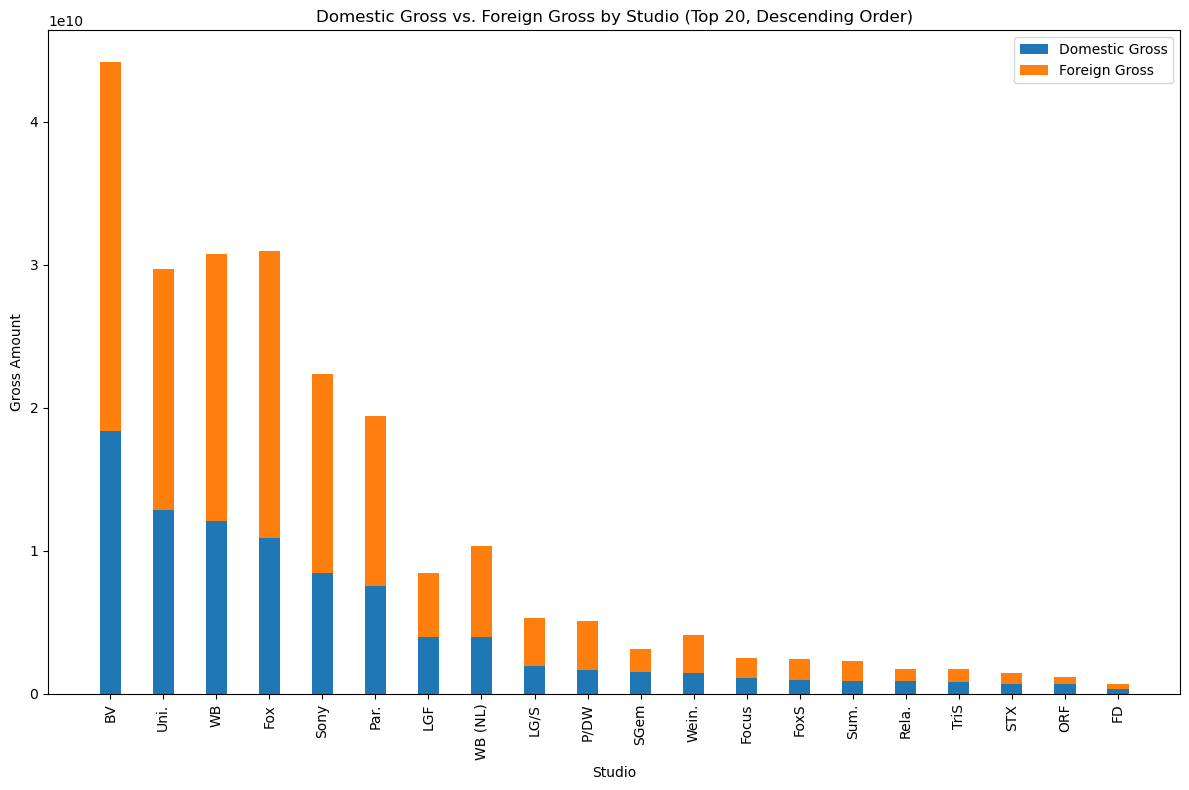

In [49]:

#Grouping the data frame
studio_groups = budget.groupby("studio")[["domestic_gross", "foreign_gross"]].sum()

#Sort the studios by total domestic gross in descending order and get the top 20
sorted_studios = studio_groups.sort_values(by="domestic_gross", ascending=False)[:20]

#Get the studio names and corresponding gross values
studio_names = sorted_studios.index
domestic_gross_values = sorted_studios["domestic_gross"]
foreign_gross_values = sorted_studios["foreign_gross"]

#Create an array for the x-axis positions
x = range(len(studio_names))

#Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(x, domestic_gross_values, width=0.4, label="Domestic Gross")
plt.bar(x, foreign_gross_values, width=0.4, label="Foreign Gross", bottom=domestic_gross_values)

#Set the x-axis labels to be studio names
plt.xticks(x, studio_names, rotation=90)

#Add labels and a title
plt.xlabel("Studio")
plt.ylabel("Gross Amount")
plt.title("Domestic Gross vs. Foreign Gross by Studio (Top 20, Descending Order)")

#Add a legend
plt.legend()

#Show the plot
plt.tight_layout()
plt.show()

In [50]:
"""
This graph shows the relationship between the studios and their gross revenue both on a domestic and foreign markets. From this findings it can be assumed that the foreign market consumes more content than the domestic market. A global appeal therefore is important for any new production studio to thrive. Studios that have a substantial presence in both domestic and foreign markets are more resilient to market-specific fluctuations. Diversification across markets can help studios maintain consistent revenue streams.
The graph suggests that top studios may have different strategies for tapping into domestic and foreign markets. Understanding these strategies can be crucial for other studios aiming to expand their global presence.
By analyzing the data over time, studios can identify trends in market preferences and adapt their content and marketing strategies accordingly.
 
"""

'\nThis graph shows the relationship between the studios and their gross revenue both on a domestic and foreign markets. From this findings it can be assumed that the foreign market consumes more content than the domestic market. A global appeal therefore is important for any new production studio to thrive. Studios that have a substantial presence in both domestic and foreign markets are more resilient to market-specific fluctuations. Diversification across markets can help studios maintain consistent revenue streams.\nThe graph suggests that top studios may have different strategies for tapping into domestic and foreign markets. Understanding these strategies can be crucial for other studios aiming to expand their global presence.\nBy analyzing the data over time, studios can identify trends in market preferences and adapt their content and marketing strategies accordingly.\n \n'

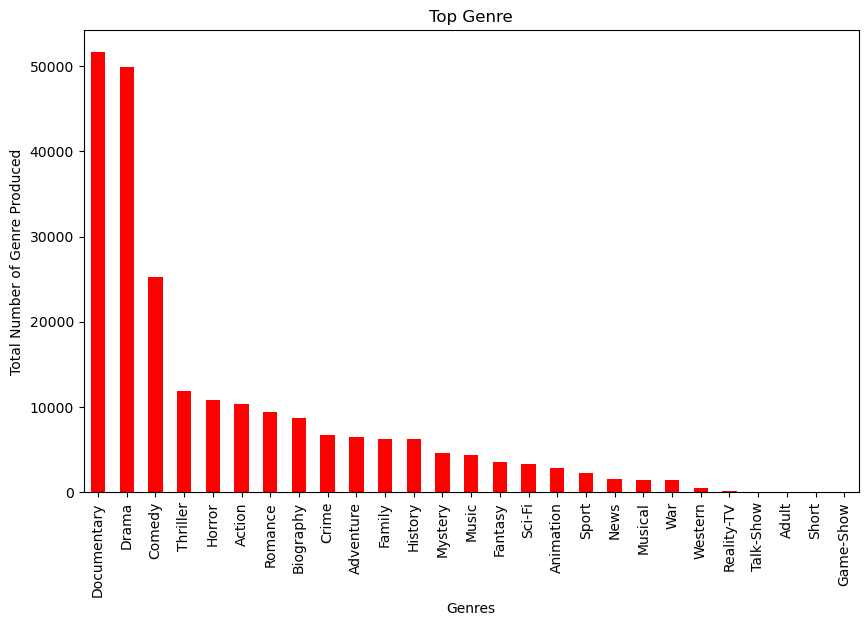

In [51]:
#Plot a bar graph

#Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the data on the specified axis as a horizontal bar plot
popular_genre.plot(kind = "bar", color = "red")

#Set the title, labels, and other formatting
ax.set_title("Top Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Total Number of Genre Produced")

#Display the plot
plt.show()

In [52]:
"""
This graph shows the relation between the genres and the total number of them produced. This shows what production companies are mostly producing. It can be assumed therefore that  documentaries take up majority of the conent in the original content space.
The graph can assist filmmakers and production companies in understanding which genres are currently popular and potentially profitable. This information can guide decisions about the types of movies to produce.
Filmmakers can use this data to tailor their marketing strategies to specific genres, ensuring that they reach the intended audience effectively.
The graph underscores the importance of diversifying content to cater to different genre preferences. Balancing popular genres with niche genres can be a strategic approach.
"""

'\nThis graph shows the relation between the genres and the total number of them produced. This shows what production companies are mostly producing. It can be assumed therefore that  documentaries take up majority of the conent in the original content space.\nThe graph can assist filmmakers and production companies in understanding which genres are currently popular and potentially profitable. This information can guide decisions about the types of movies to produce.\nFilmmakers can use this data to tailor their marketing strategies to specific genres, ensuring that they reach the intended audience effectively.\nThe graph underscores the importance of diversifying content to cater to different genre preferences. Balancing popular genres with niche genres can be a strategic approach.\n'

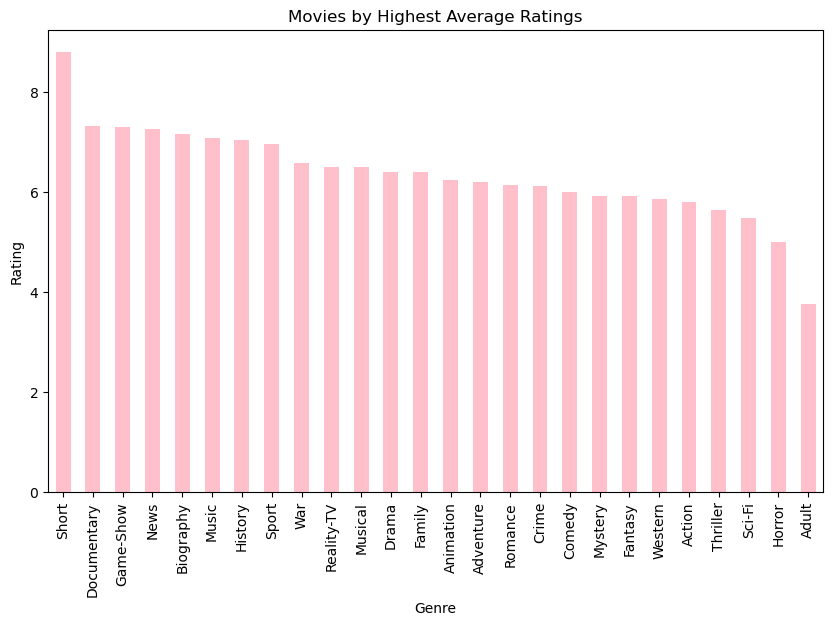

In [53]:
#Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the data on the specified axis as a horizontal bar plot
mean_sorted.plot(kind = "bar", color = "pink")

#Set the title, labels, and other formatting
ax.set_title("Movies by Highest Average Ratings")
ax.set_xlabel("Genre")
ax.set_ylabel("Rating")

#Display the plot
plt.show()

In [54]:
"""
This graph shows the relationship  between the genres and how the consumers rate them in terms of popularity.Filmmakers and production companies can use this data to inform their decisions about which genres to explore for future movie projects. High average ratings suggest potential audience interest.
Understanding the genres that resonate with viewers can help in developing content strategies that cater to specific tastes and preferences.
Genres with high average ratings may be targeted in marketing campaigns to highlight their positive reception by audiences
"""

'\nThis graph shows the relationship  between the genres and how the consumers rate them in terms of popularity.Filmmakers and production companies can use this data to inform their decisions about which genres to explore for future movie projects. High average ratings suggest potential audience interest.\nUnderstanding the genres that resonate with viewers can help in developing content strategies that cater to specific tastes and preferences.\nGenres with high average ratings may be targeted in marketing campaigns to highlight their positive reception by audiences\n'

In [55]:
"""
From the information gathered we have the following findings:-
1. The wider the reach of the content the better the return on investment
2. The more a genre is produced doesn't guarantee its popularity in terms of the audience will rate it.
Shorts have the highest rating but is produced less. That shows that audience enjoy shorter content. 
This might be due in part to the more engaging and easier to digest content that the shorts offer.
This analysis seeks to explore the interrelation between various graphs, each representing different aspects of the movie industry,
including consumer trends, production trends, earning potential, and competition.

We can gain insights into how these factors interact and influence one another in the dynamic world of filmmaking.
It identifies genres that resonate well with audiences, reflecting their preferences for high-quality content.
The frequency of production indicates the demand for specific genres, reflecting audience interests.

Studios that excel in foreign markets may adjust their production strategies to cater to global audiences.
Studios' earning potential is evident in their total gross revenue, highlighting successful production and distribution strategies.
The graph illustrates competition among studios for domestic and foreign markets, showing which studios dominate.
There is a correlation between consumer preferences (as seen in "Movies by Highest Average Ratings") and production trends (as seen in "Top Genre Production").
High-rated genres may lead to increased production in those genres to meet audience demand.

Conclusion:
These graphs collectively provide valuable insights into the movie industry. Consumer trends, production trends, earning potential, 
and competition are closely interconnected. Successful studios identify consumer preferences, adjust their production strategies,
and compete for a larger share of the global market. 
By analyzing these aspects together, industry stakeholders can make informed decisions to navigate the dynamic landscape of filmmaking effectively.
"""

'\nFrom the information gathered we have the following findings:-\n1. The wider the reach of the content the better the return on investment\n2. The more a genre is produced doesn\'t guarantee its popularity in terms of the audience will rate it.\nShorts have the highest rating but is produced less. That shows that audience enjoy shorter content. \nThis might be due in part to the more engaging and easier to digest content that the shorts offer.\nThis analysis seeks to explore the interrelation between various graphs, each representing different aspects of the movie industry,\nincluding consumer trends, production trends, earning potential, and competition.\n\nWe can gain insights into how these factors interact and influence one another in the dynamic world of filmmaking.\nIt identifies genres that resonate well with audiences, reflecting their preferences for high-quality content.\nThe frequency of production indicates the demand for specific genres, reflecting audience interests.\n\